# Capstone Two - Pre-processing & Training Data Development

## 1. Introduction

Employee attrition, a persistent challenge impacting productivity and morale, poses a significant hurdle for organizations. Leveraging HR analytics, this project aims to dissect the underlying factors driving attrition. Through comprehensive data exploration and analysis, our goal is to unearth insights that empower organizations to enhance retention strategies and cultivate a thriving workforce. By employing machine learning techniques to predict attrition probabilities, we can assist human resource departments in making strategic decisions. This project explores various machine learning models to forecast attrition within an organization and aims to identify the most effective model. Ultimately, our analysis seeks to make a valuable contribution to optimizing human resource management processes within enterprises, fostering sustainable growth and success.

## 2. Imports

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

## 3. Load HR Analytics Data

In [2]:
# Read in the dataset
df = pd.read_csv('C:/Users/tubac/OneDrive/Desktop/Springboard/CapstoneTwo-HRAnalytics/dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 4. Data Definiton

In [4]:
# Structure of the dataframe
df.sample(5).transpose()

,363,39,165,892,1307
Age,33,33,50,19,28
Attrition,Yes,No,No,Yes,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Non-Travel,Travel_Rarely
DailyRate,350,1141,1452,504,1217
Department,Sales,Sales,Research & Development,Research & Development,Research & Development
DistanceFromHome,5,1,11,10,1
Education,3,3,3,3,3
EducationField,Marketing,Life Sciences,Life Sciences,Medical,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,485,52,226,1248,1834


In [5]:
# State of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are 1,470 rows and 35 columns in the data.

The data types of the columns are sensible.

In [6]:
# Description of the columns (summary statistics for each column)
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0



'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus' and 'OverTime' columns have unique values. We can check the counts and percentages of unique values.

Also, 'EmployeeCount', 'Over18' and 'StandardHours' columns seems to have same value. 
 


In [7]:
# Unique values and counts
unique_values = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df[unique_values].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [8]:
# Percents of unique values
for i in unique_values:
    print(df[i].value_counts(normalize=True)*100, "\n")

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64 

BusinessTravel
Travel_Rarely        70.952381
Travel_Frequently    18.843537
Non-Travel           10.204082
Name: proportion, dtype: float64 

Department
Research & Development    65.374150
Sales                     30.340136
Human Resources            4.285714
Name: proportion, dtype: float64 

EducationField
Life Sciences       41.224490
Medical             31.564626
Marketing           10.816327
Technical Degree     8.979592
Other                5.578231
Human Resources      1.836735
Name: proportion, dtype: float64 

Gender
Male      60.0
Female    40.0
Name: proportion, dtype: float64 

JobRole
Sales Executive              22.176871
Research Scientist           19.863946
Laboratory Technician        17.619048
Manufacturing Director        9.863946
Healthcare Representative     8.911565
Manager                       6.938776
Sales Representative          5.646259
Research Director             5.442177
Hu

## 5. Data Cleaning

In [9]:
# Check for missing values
df.isnull().values.any()

False

There is no missing data!

In [10]:
# Check for duplicates
df.duplicated().sum()

0


There are no duplicate rows!

According to summary statistics for each column; 'EmployeeCount', 'Over18' and 'StandardHours' seems to have same values. Let's check it!


In [11]:
# Find useless features
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [12]:
# Drop useless features (variables with zero variance)
df = df.drop(columns=['StandardHours', 'EmployeeCount', 'Over18'], axis = 1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [13]:
# Validating numerical data
df.select_dtypes("number").head().transpose()

,0,1,2,3,4
Age,41,49,37,33,27
DailyRate,1102,279,1373,1392,591
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EmployeeNumber,1,2,4,5,7
EnvironmentSatisfaction,2,3,4,4,1
HourlyRate,94,61,92,56,40
JobInvolvement,3,2,2,3,3
JobLevel,2,2,1,1,1
JobSatisfaction,4,2,3,3,2


In [14]:
# Move response variable to the last column
front = df['Attrition']
df.drop(labels=['Attrition'], axis=1,inplace=True)
df.insert(31,'Attrition',front)
df.head(3)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,1,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,...,4,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,...,2,0,7,3,3,0,0,0,0,Yes


In [15]:
# Change some object types to categories
cols = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for col in cols:
    df[col] = df[col].astype('category')

In [16]:
# Reassign response variable as No=0 and Yes=1
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
df['Attrition'].unique()

array([1, 0], dtype=int64)

## 6. Exploratory Data Analysis (EDA)

We have a dataset with 32 features, encompassing both categorical and numerical variables. The target variable is **'Attrition'** indicating whether employees have resigned, denoted by '1' for 'Yes' and '0' for 'No.' The objective is to predict employee attrition.

To gain insights into the reasons behind employee attrition, let's conduct a visual analysis of the relationships between features. This involves a detailed exploration of the interconnections and trends within the dataset.

In [17]:
# Copy df for EDA
df2 = df.copy()

### Target Variable

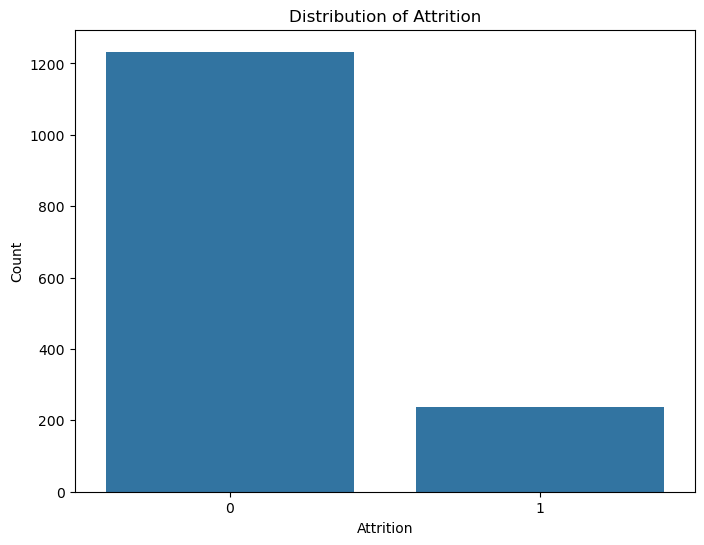

In [18]:
# Countplot to visualize the distribution of 'Attrition'
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df2)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Distribution of Attrition')
plt.show()

The company has a total of 1470 employees. Unfortunately, 237 employees, constituting 16% of the workforce, have left the company for various reasons. On a positive note, 1233 employees are currently continuing their employment within the organization.

### Features

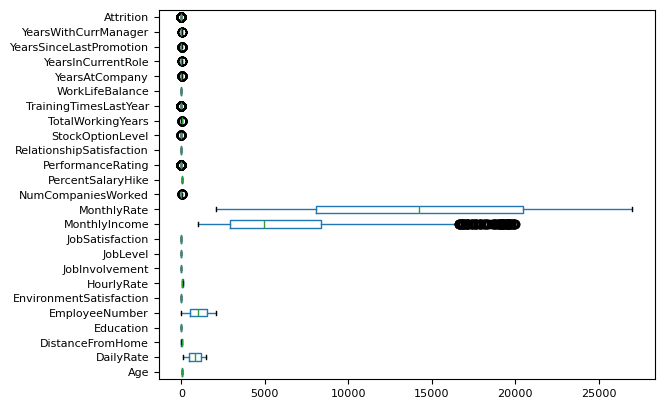

In [19]:
# Boxplot for every column in df
boxplot = df2.boxplot(grid=False, vert=False, fontsize=8)

All features in the dataset exhibit significant scale differences, making boxplots less suitable for visualization. Instead, a more effective approach would be to generate histograms for various continuously distributed features, providing a clearer representation of their distributions and facilitating a more insightful analysis.

Let's create a function to handle the implementation of a dataframe and graphs for each feature in the dataset.

In [20]:
def analyze_feature(x, data):
    feature = data.groupby(x).agg({'Attrition': ['size', 'sum', 'mean']})
    feature.columns = ['Total Employee', 'Attrition Number', 'Attrition Rate']
    feature['% Attrition in the Company'] = (feature['Attrition Number'] / 237) * 100
    feature = feature.reset_index()

    print(f"{x} & Attrition Table")
    print(feature)

    plt.figure(figsize=(8, 4))
    sns.set(style="whitegrid")
    ax = sns.barplot(x=x, y='Total Employee', data=feature, palette='winter')
    ax2 = ax.twinx()
    ax2.plot(feature[x], feature['Attrition Rate'], color='blue', marker='o')
    
    plt.title(f'Attrition Compared to {x}')
    plt.xlabel(x)
    plt.ylabel('Total Employee')
    ax2.set_ylabel('Attrition Rate', color='blue')
    
    plt.show()

In [21]:
# Labeling age groups directly within the dataframe
bins = [17, 21, 25, 35, 60]
group_names = ['(18-21)', '(22-25)', '(26-35)', '(36-60)']
df2['Age'] = pd.cut(df2['Age'], bins, labels=group_names)

Age & Attrition Table
       Age  Total Employee  Attrition Number  Attrition Rate  \
0  (18-21)              41                22        0.536585   
1  (22-25)              82                22        0.268293   
2  (26-35)             606               116        0.191419   
3  (36-60)             741                77        0.103914   

   % Attrition in the Company  
0                    9.282700  
1                    9.282700  
2                   48.945148  
3                   32.489451  


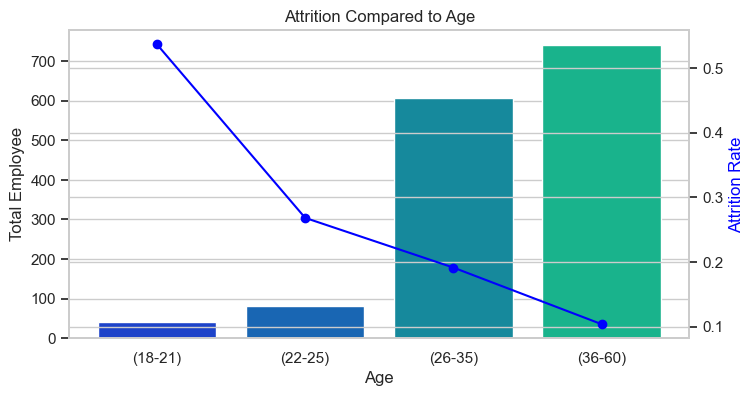

In [22]:
analyze_feature(x='Age', data=df2)

The analysis highlights varying attrition rates across age groups. Younger employees (18-25) show higher attrition, while the (26-35) age group contributes the most to overall attrition. Understanding these trends is key for targeted retention efforts and ensuring a balanced workforce across different age brackets.

BusinessTravel & Attrition Table
      BusinessTravel  Total Employee  Attrition Number  Attrition Rate  \
0         Non-Travel             150                12        0.080000   
1  Travel_Frequently             277                69        0.249097   
2      Travel_Rarely            1043               156        0.149569   

   % Attrition in the Company  
0                    5.063291  
1                   29.113924  
2                   65.822785  


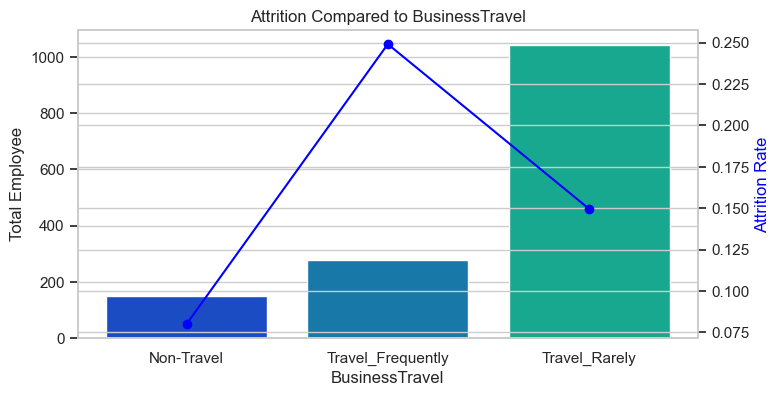

In [23]:
analyze_feature(x='BusinessTravel', data=df2)

The company's workforce primarily consists of employees who travel rarely or not at all (81.1%). Despite being the largest group, those who rarely travel contribute to 65.8% of the total attrition. Notably, employees required to travel frequently face a higher attrition rate (24.9%) compared to their counterparts who don't travel (8%). This insight underscores the need for tailored retention efforts to address specific challenges within different travel categories and ensure a balanced and stable workforce.

Department & Attrition Table
               Department  Total Employee  Attrition Number  Attrition Rate  \
0         Human Resources              63                12        0.190476   
1  Research & Development             961               133        0.138398   
2                   Sales             446                92        0.206278   

   % Attrition in the Company  
0                    5.063291  
1                   56.118143  
2                   38.818565  


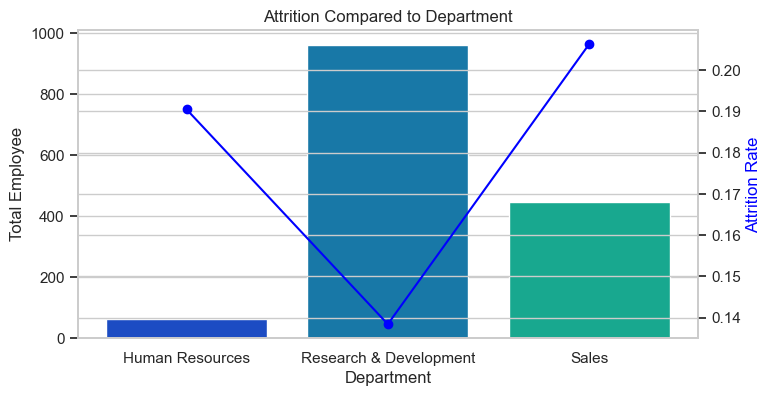

In [24]:
analyze_feature(x='Department', data=df2)

Human Resources Department: Despite a relatively high attrition rate within the Human Resources Department, this represents a smaller share of the overall company attrition.
>Attrition Rate: 19%
>Attrition Number: 12
>% of Attrition in the Company: 5%


Research & Development Department: While Research & Development experiences the highest overall attrition number, its attrition rate is comparatively lower within the department.
>Attrition Rate: 13.8%
>Attrition Number: 133
>% of Attrition in the Company: 56.1%


Sales Department: The Sales Department has been significantly affected by attrition, with the highest attrition rate among the three departments, contributing to a substantial portion of the overall company attrition.
>Attrition Rate: 20.6%
>Attrition Number: 92
% of Attrition in the Company: 38.8%


DistanceFromHomeGroup & Attrition Table
  DistanceFromHomeGroup  Total Employee  Attrition Number  Attrition Rate  \
0                   1-3             503                68        0.135189   
1                   4-6             188                26        0.138298   
2                  7-10             335                50        0.149254   
3                   10+             444                93        0.209459   

   % Attrition in the Company  
0                   28.691983  
1                   10.970464  
2                   21.097046  
3                   39.240506  


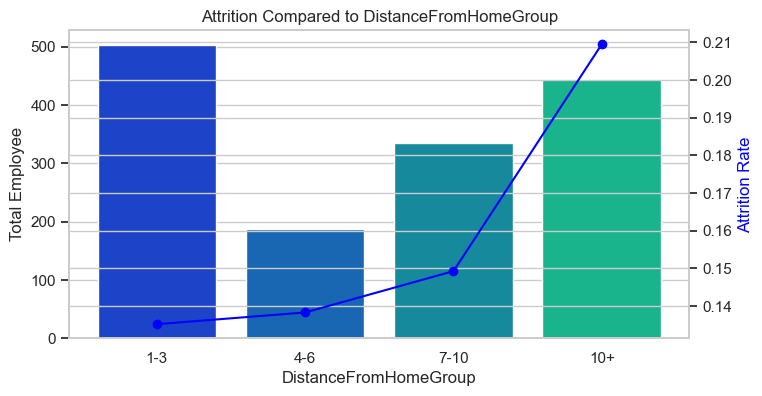

In [25]:
bins = [0, 3, 6, 10, 29]
group_names = ['1-3', '4-6', '7-10', '10+']
df2['DistanceFromHomeGroup'] = pd.cut(df2['DistanceFromHome'], bins, labels=group_names)

analyze_feature(x='DistanceFromHomeGroup', data=df2)

Employees residing 1-3 miles away form a significant portion (1/3) of the company, with an attrition rate of 28.7%.

Conversely, those living 10+ miles away, another 1/3 of the workforce, experience a higher attrition rate at 39.2%.

The trend suggests an increasing attrition rate within each distance group as the distance from home to the company grows. This insight underscores the potential impact of commute distance on employee retention.

Education & Attrition Table
       Education  Total Employee  Attrition Number  Attrition Rate  \
0       Bachelor             572                99        0.173077   
1  Below College             170                31        0.182353   
2        College             282                44        0.156028   
3         Doctor              48                 5        0.104167   
4         Master             398                58        0.145729   

   % Attrition in the Company  
0                   41.772152  
1                   13.080169  
2                   18.565401  
3                    2.109705  
4                   24.472574  


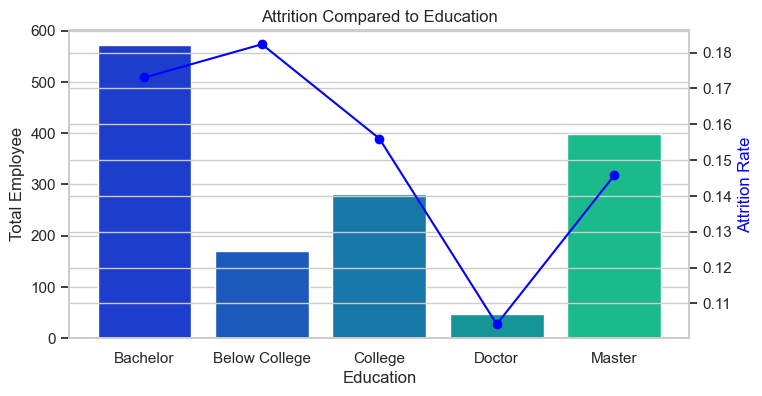

In [26]:
# Labeling education levels
education_mapping = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
df2['Education'] = df2['Education'].map(education_mapping)

# Analyzing Education Level
analyze_feature(x='Education', data=df2)

Employees with a Bachelor's degree experience the highest attrition number, contributing to 41.8% of the overall attrition in the company.

Ph.D. degree holders have the lowest attrition number, representing only 2.1% of the total attrition.

Master's, College, and Below College degree holders follow a descending order in terms of attrition numbers, showcasing a gradual decrease in attrition across these educational levels.

EducationField & Attrition Table
     EducationField  Total Employee  Attrition Number  Attrition Rate  \
0   Human Resources              27                 7        0.259259   
1     Life Sciences             606                89        0.146865   
2         Marketing             159                35        0.220126   
3           Medical             464                63        0.135776   
4             Other              82                11        0.134146   
5  Technical Degree             132                32        0.242424   

   % Attrition in the Company  
0                    2.953586  
1                   37.552743  
2                   14.767932  
3                   26.582278  
4                    4.641350  
5                   13.502110  


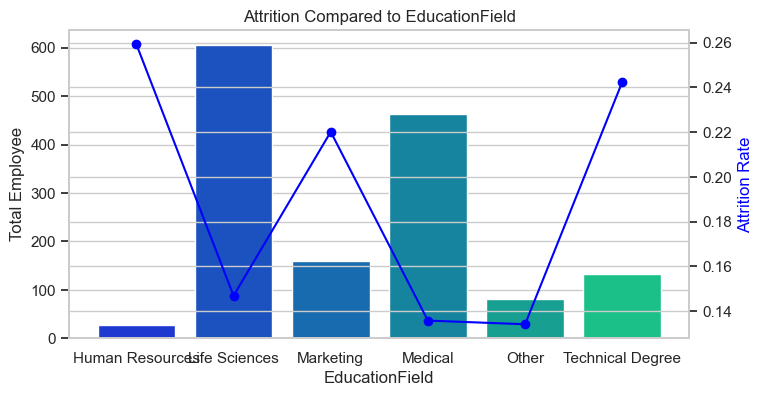

In [27]:
# Analyzing Education Field
analyze_feature(x='EducationField', data=df2)

Life Sciences education level records the highest overall attrition number, constituting 37.5% of the company's total attrition. However, within the Life Sciences field, this attrition contributes to a lower percentage (14.7%).

Medical education level follows, contributing 13.57% to the overall attrition but making up 14.7% within the Medical field.

Human Resources, Technical Degree, and Marketing fields exhibit higher attrition rates ranging from 22% to 26%, signifying significant employee turnover within these specific fields.

EnvironmentSatisfaction & Attrition Table
  EnvironmentSatisfaction  Total Employee  Attrition Number  Attrition Rate  \
0                    High             453                62        0.136865   
1                     Low             284                72        0.253521   
2                  Medium             287                43        0.149826   
3               Very High             446                60        0.134529   

   % Attrition in the Company  
0                   26.160338  
1                   30.379747  
2                   18.143460  
3                   25.316456  


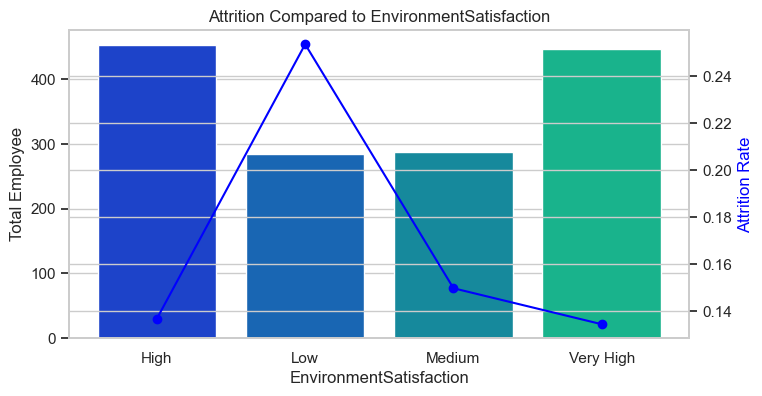

In [28]:
# Labeling environment satisfaction
df2['EnvironmentSatisfaction'] = df2['EnvironmentSatisfaction'].map({1:'Low', 2:'Medium', 
                                                                     3:'High', 4:'Very High'})
analyze_feature(x='EnvironmentSatisfaction', data=df2)

Employees in a low satisfaction environment exhibit the highest attrition rate, constituting 30.4% of the company's total attrition.

Surprisingly, even in high and very high satisfaction environments, there is still a notable attrition rate of 13.7% for each group. Collectively, these groups contribute to 51.5% of the overall company attrition.

These findings suggest that while a low satisfaction environment correlates with higher attrition, other factors beyond environment satisfaction may significantly influence employee turnover in the company.

Gender & Attrition Table
   Gender  Total Employee  Attrition Number  Attrition Rate  \
0  Female             588                87        0.147959   
1    Male             882               150        0.170068   

   % Attrition in the Company  
0                   36.708861  
1                   63.291139  


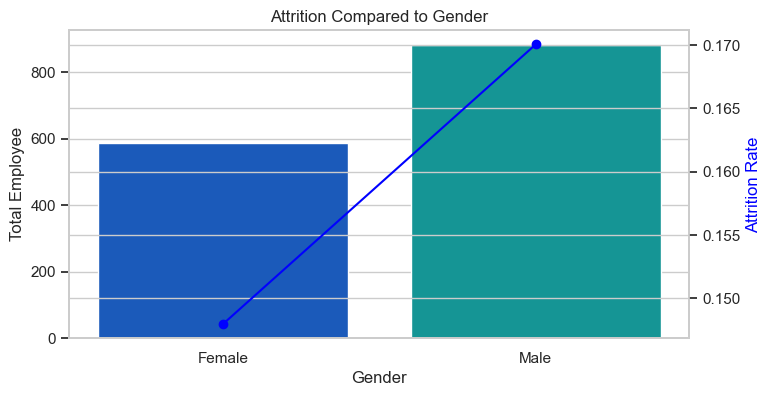

In [29]:
analyze_feature(x='Gender', data=df2)

Male employees have a higher attrition rate (17%) compared to females (14.8%), constituting 63.3% of the total company attrition.

JobInvolvement & Attrition Table
  JobInvolvement  Total Employee  Attrition Number  Attrition Rate  \
0           High             868               125        0.144009   
1            Low              83                28        0.337349   
2         Medium             375                71        0.189333   
3      Very High             144                13        0.090278   

   % Attrition in the Company  
0                   52.742616  
1                   11.814346  
2                   29.957806  
3                    5.485232  


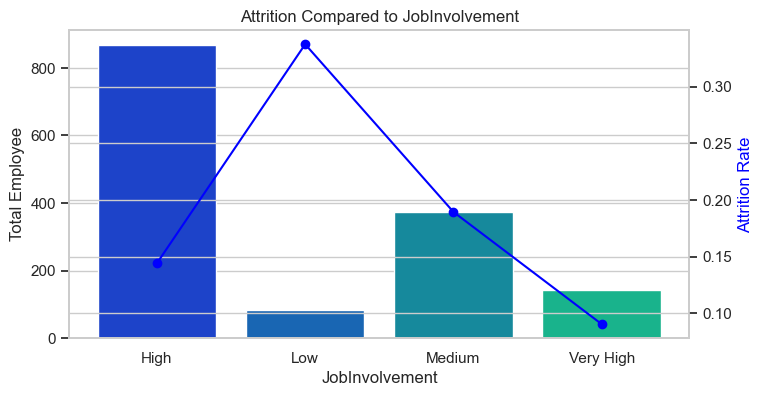

In [30]:
# Labeling Job Involvement Groups
df2['JobInvolvement'] = df2['JobInvolvement'].map({1:'Low', 2:'Medium', 
                                                   3:'High', 4:'Very High'})

analyze_feature(x='JobInvolvement', data=df2)

High job involvement, comprising 59% of employees, has the highest attrition number (125) but a relatively low attrition rate (14.4%). Low job involvement stands out with a high attrition rate of 33.7%, contributing significantly to the overall company attrition (11.8%). Medium job involvement follows with an 18.9% attrition rate, while Very High job involvement has the lowest attrition rate at 9%, making up 5.5% of the total attrition.

JobLevel & Attrition Table
  JobLevel  Total Employee  Attrition Number  Attrition Rate  \
0  Level-1             543               143        0.263352   
1  Level-2             534                52        0.097378   
2  Level-3             218                32        0.146789   
3  Level-4             106                 5        0.047170   
4  Level-5              69                 5        0.072464   

   % Attrition in the Company  
0                   60.337553  
1                   21.940928  
2                   13.502110  
3                    2.109705  
4                    2.109705  


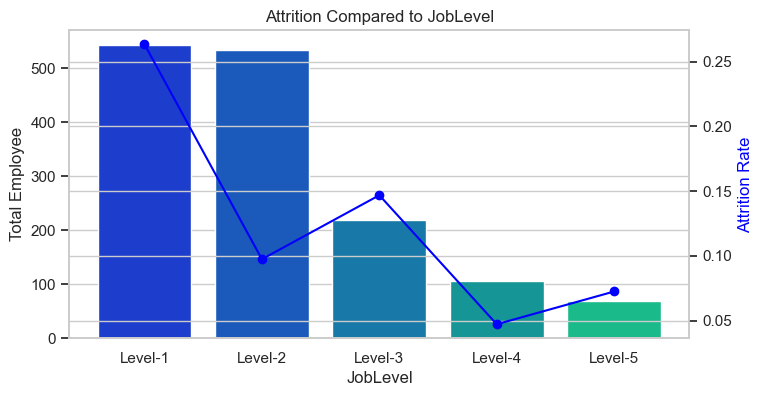

In [31]:
# Labeling job levels
df2['JobLevel'] = df2['JobLevel'].map({1:'Level-1', 2:'Level-2', 
                                       3:'Level-3', 4:'Level-4', 5:'Level-5'})

analyze_feature(x='JobLevel', data=df2)

Job Level-1 has the highest attrition rate at 26.3%, with 143 employees leaving the company, constituting 60.3% of the total attrition.
As job levels increase, the attrition numbers decrease, indicating a negative correlation between job level and attrition.

This pattern suggests that employees in lower job levels are more likely to leave the company compared to those in higher job levels.

JobRole & Attrition Table
       JobRole  Total Employee  Attrition Number  Attrition Rate  \
0       H Rep.             131                 9        0.068702   
1           HR              52                12        0.230769   
2       Lab T.             259                62        0.239382   
3      Manager             102                 5        0.049020   
4    Manuf. D.             145                10        0.068966   
5  Research D.              80                 2        0.025000   
6    Sales Ex.             326                57        0.174847   
7   Sales Rep.              83                33        0.397590   

   % Attrition in the Company  
0                    3.797468  
1                    5.063291  
2                   26.160338  
3                    2.109705  
4                    4.219409  
5                    0.843882  
6                   24.050633  
7                   13.924051  


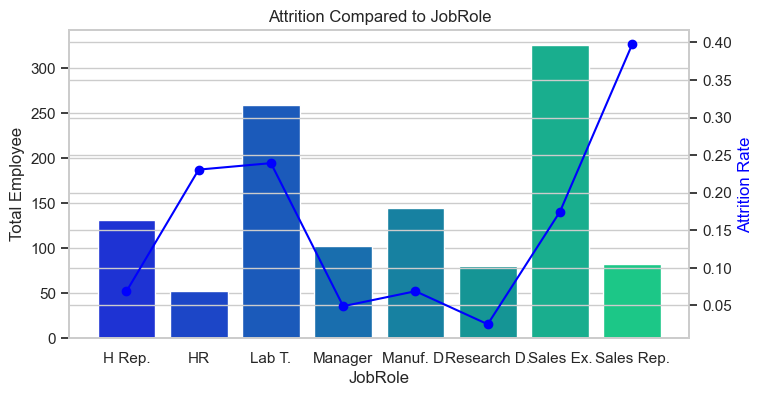

In [32]:
df2['JobRole'] = df2['JobRole'].map({'Healthcare Representative':'H Rep.', 'Human Resources':'HR', 
                                    'Laboratory Technician':'Lab T.', 'Manager':'Manager', 
                                   'Manufacturing Director':'Manuf. D.', 'Research Director':'Research D.', 
                                   'Sales Executive':'Sales Ex.', 'Sales Representative':'Sales Rep.'})
analyze_feature(x='JobRole', data=df2)

Laboratory Technicians experience the highest attrition rate at 26.2%, contributing significantly to the overall attrition in the company (26.2% of total attrition).

Sales Executive and Research Scientist roles follow, with 24.1% and 19.8% of attrition, respectively, collectively constituting 44% of the company's total attrition.

Sales Representative faces the highest attrition impact within its role, with approximately 40% of employees leaving the company.

Research Director exhibits the lowest attrition rate both within its role (0.8%) and in the entire company (2.5%).

JobSatisfaction & Attrition Table
  JobSatisfaction  Total Employee  Attrition Number  Attrition Rate  \
0            High             442                73        0.165158   
1             Low             289                66        0.228374   
2          Medium             280                46        0.164286   
3       Very High             459                52        0.113290   

   % Attrition in the Company  
0                   30.801688  
1                   27.848101  
2                   19.409283  
3                   21.940928  


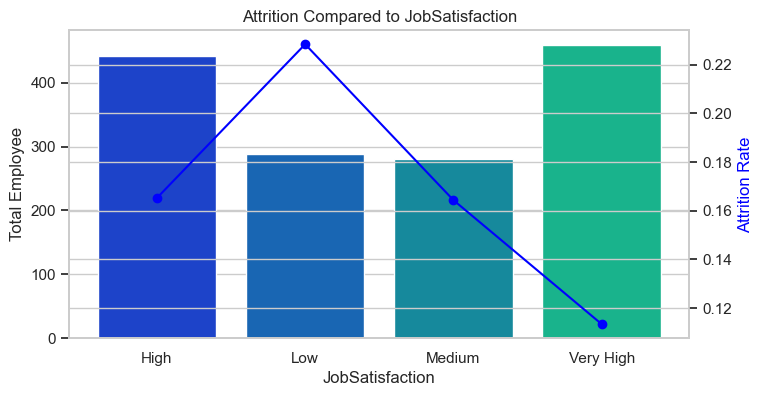

In [33]:
# Labeling Job Role 
df2['JobSatisfaction'] = df2['JobSatisfaction'].map({1:'Low', 2:'Medium',
                                                     3:'High', 4:'Very High'}) 

analyze_feature(x='JobSatisfaction', data=df2)

The analysis suggests that job satisfaction levels influence attrition, with higher satisfaction associated with lower attrition rates.

MaritalStatus & Attrition Table
  MaritalStatus  Total Employee  Attrition Number  Attrition Rate  \
0      Divorced             327                33        0.100917   
1       Married             673                84        0.124814   
2        Single             470               120        0.255319   

   % Attrition in the Company  
0                   13.924051  
1                   35.443038  
2                   50.632911  


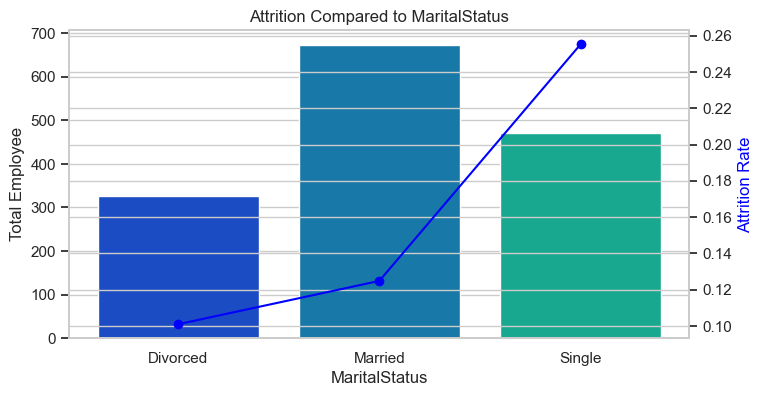

In [34]:
analyze_feature(x='MaritalStatus', data=df2)

The analysis indicates that single employees experience the highest attrition rate among marital status groups, significantly impacting the overall attrition in the company.

MonthlyIncome & Attrition Table
  MonthlyIncome  Total Employee  Attrition Number  Attrition Rate  \
0     1000-2000              33                18        0.545455   
1     2000-3000             362                95        0.262431   
2     3000-4000             148                24        0.162162   
3     4000-5000             206                26        0.126214   
4     5000-7500             310                30        0.096774   
5     7500-9000              78                10        0.128205   
6    9000-11000             118                22        0.186441   
7   11000-15000              82                 7        0.085366   
8   15000-20000             133                 5        0.037594   

   % Attrition in the Company  
0                    7.594937  
1                   40.084388  
2                   10.126582  
3                   10.970464  
4                   12.658228  
5                    4.219409  
6                    9.282700  
7                    

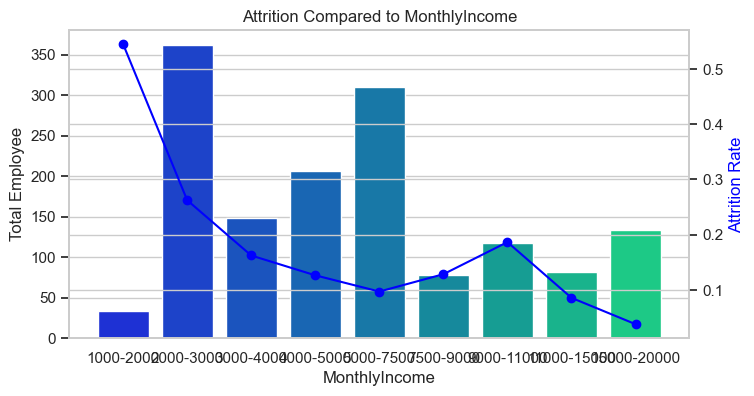

In [35]:
# Labeling Monthly Income Level
bins = [1000, 2000, 3000, 4000, 5000, 7500, 9000, 11000, 15000, 20000]
group_names = ['1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-7500', 
               '7500-9000', '9000-11000', '11000-15000', '15000-20000']             
df2["MonthlyIncome"] = pd.cut(df2["MonthlyIncome"], bins, labels = group_names)

analyze_feature(x='MonthlyIncome', data=df2)

The analysis reveals that employees with lower and mid-range monthly incomes, particularly in the $ **2000 - 3000** bracket, experience higher attrition rates, impacting the overall attrition in the company.

NumCompaniesWorked & Attrition Table
  NumCompaniesWorked  Total Employee  Attrition Number  Attrition Rate  \
0                  0             197                23        0.116751   
1                  1             521                98        0.188100   
2                  2             146                16        0.109589   
3                  3             159                16        0.100629   
4                  4             139                17        0.122302   
5                 5+             308                67        0.217532   

   % Attrition in the Company  
0                    9.704641  
1                   41.350211  
2                    6.751055  
3                    6.751055  
4                    7.172996  
5                   28.270042  


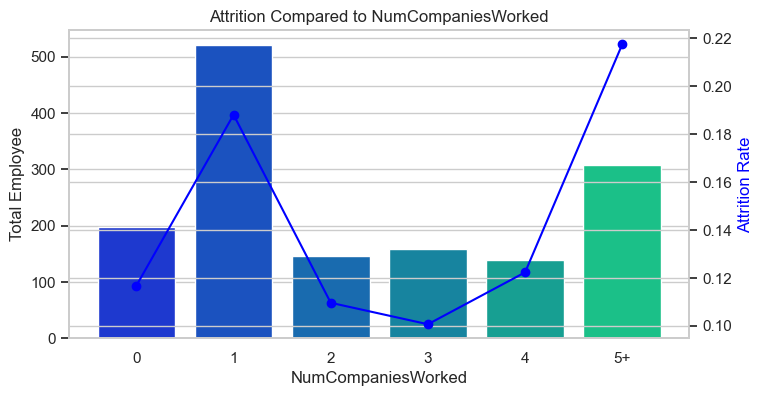

In [36]:
# Labeling Numbers Companied Worked Groups
bins = [0, 1, 2, 3, 4, 5, 10]
group_names = ['0', '1', '2', '3', '4', '5+']             
df2['NumCompaniesWorked'] = pd.cut(df2['NumCompaniesWorked'], bins, labels = group_names, 
                                        include_lowest = True, right = False)

analyze_feature(x='NumCompaniesWorked', data=df2)

The attrition pattern suggests that employees with one prior company experience are more likely to leave, constituting the highest attrition number at 41.3% of the total. Interestingly, employees with no prior company experience also exhibit significant attrition. Moreover, those with more extensive work experience (5+ companies) tend to have the highest attrition within their respective experience groups.

OverTime & Attrition Table
  OverTime  Total Employee  Attrition Number  Attrition Rate  \
0       No            1054               110        0.104364   
1      Yes             416               127        0.305288   

   % Attrition in the Company  
0                   46.413502  
1                   53.586498  


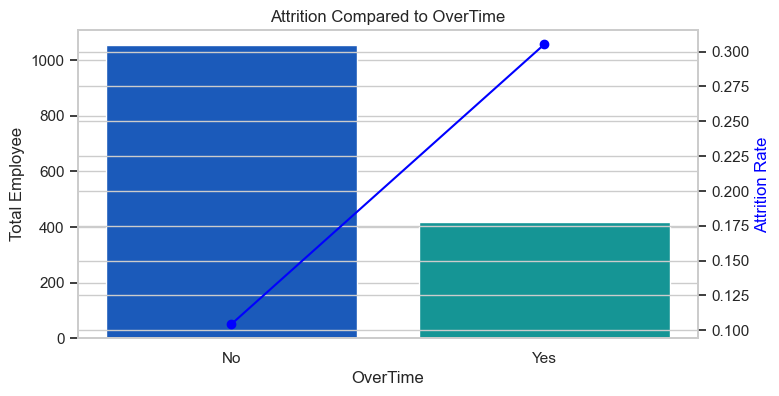

In [37]:
analyze_feature(x='OverTime', data=df2)

Among employees, 28.3% engage in overtime work, and this group exhibits a higher attrition rate compared to those who do not work overtime. Although the overall difference in attrition numbers is not significant, individuals working overtime are considerably more likely to leave the company, constituting 53.6% of the total attrition.

PercentSalaryHike & Attrition Table
  PercentSalaryHike  Total Employee  Attrition Number  Attrition Rate  \
0             11-14             818               132        0.161369   
1             15-18             350                59        0.168571   
2             19-22             235                33        0.140426   
3             23-25              67                13        0.194030   

   % Attrition in the Company  
0                   55.696203  
1                   24.894515  
2                   13.924051  
3                    5.485232  


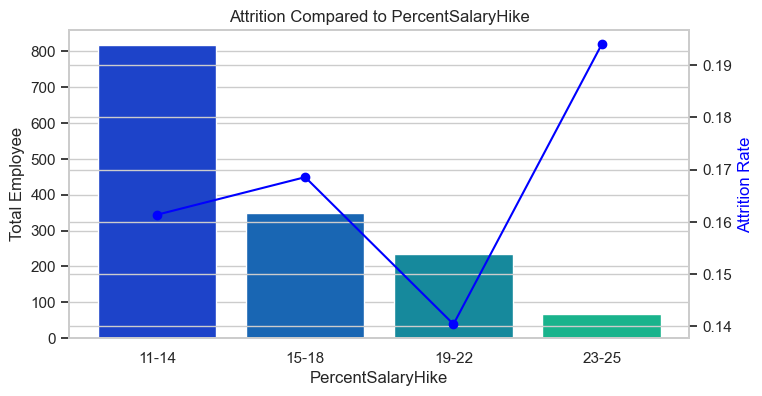

In [38]:
# Percent Salary Hike & Attrition Table
bins = [10, 14, 18, 22, 25]
group_names = ['11-14', '15-18', '19-22', '23-25']             
df2['PercentSalaryHike'] = pd.cut(df2['PercentSalaryHike'], bins, labels = group_names)

analyze_feature(x='PercentSalaryHike', data=df2)

Employees who experience a percent salary hike in the range of 11-14% have the highest attrition number, contributing to 55.7% of the total company attrition. Those with a salary hike in the range of 15-18% follow, with a 24.9% share of overall attrition. Conversely, individuals with a percent salary hike in the range of 23-25% have the lowest attrition number but still constitute 5.5% of the total company attrition.

PerformanceRating & Attrition Table
   PerformanceRating  Total Employee  Attrition Number  Attrition Rate  \
0                  3            1244               200        0.160772   
1                  4             226                37        0.163717   

   % Attrition in the Company  
0                   84.388186  
1                   15.611814  


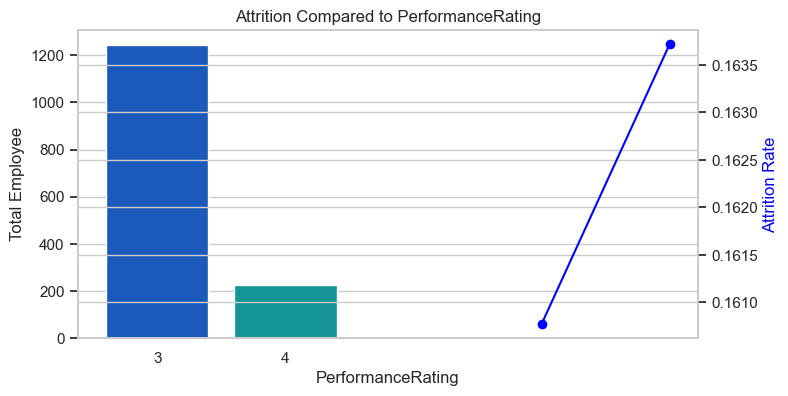

In [39]:
analyze_feature(x='PerformanceRating', data=df2)

Employees with a performance rating of 3 have a higher attrition number, making up 84.4% of the total company attrition. Those with a performance rating of 4 have a lower attrition number, accounting for 15.6% of overall company attrition.

RelationshipSatisfaction & Attrition Table
  RelationshipSatisfaction  Total Employee  Attrition Number  Attrition Rate  \
0                     High             459                71        0.154684   
1                      Low             276                57        0.206522   
2                   Medium             303                45        0.148515   
3                Very High             432                64        0.148148   

   % Attrition in the Company  
0                   29.957806  
1                   24.050633  
2                   18.987342  
3                   27.004219  


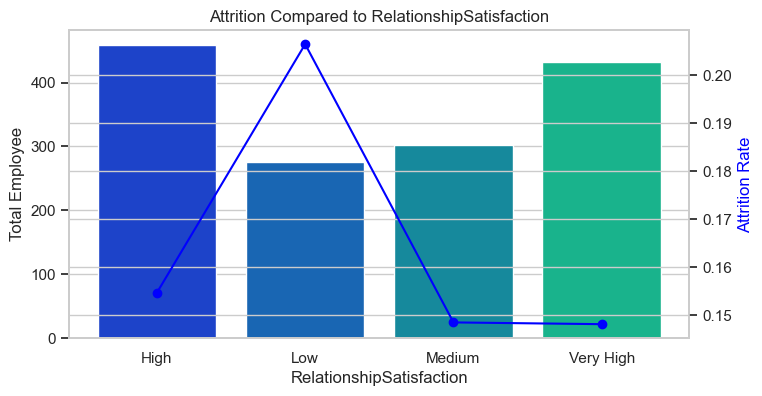

In [40]:
# Labeling Relationship Satisfaction Levels
df2['RelationshipSatisfaction'] = df2['RelationshipSatisfaction'].map({1:'Low', 2:'Medium', 
                                                                       3:'High', 4:'Very High'})

analyze_feature(x='RelationshipSatisfaction', data=df2)

Employees with low relationship satisfaction have a higher attrition rate, contributing to 24.1% of the company's overall attrition. Those with high relationship satisfaction also exhibit significant attrition, comprising 30% of the total company attrition.

StockOptionLevel & Attrition Table
   StockOptionLevel  Total Employee  Attrition Number  Attrition Rate  \
0                 0             631               154        0.244057   
1                 1             596                56        0.093960   
2                 2             158                12        0.075949   
3                 3              85                15        0.176471   

   % Attrition in the Company  
0                   64.978903  
1                   23.628692  
2                    5.063291  
3                    6.329114  


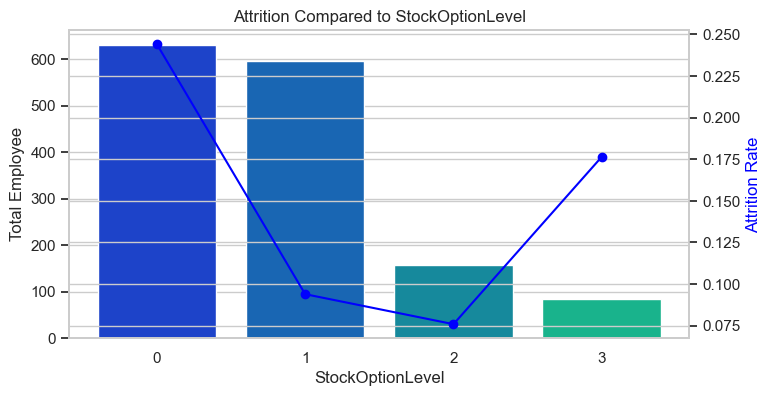

In [41]:
analyze_feature(x='StockOptionLevel', data=df2)

Employees with zero stock options have the highest attrition rate, contributing to nearly 65% of the company's overall attrition. Conversely, employees with one stock option level exhibit a lower attrition rate of 23.6%.

TotalWorkingYears & Attrition Table
  TotalWorkingYears  Total Employee  Attrition Number  Attrition Rate  \
0                 1              92                45        0.489130   
1               2-5             224                46        0.205357   
2              6-10             607                91        0.149918   
3             11-15             191                24        0.125654   
4             16-20             149                15        0.100671   
5               20+             207                16        0.077295   

   % Attrition in the Company  
0                   18.987342  
1                   19.409283  
2                   38.396624  
3                   10.126582  
4                    6.329114  
5                    6.751055  


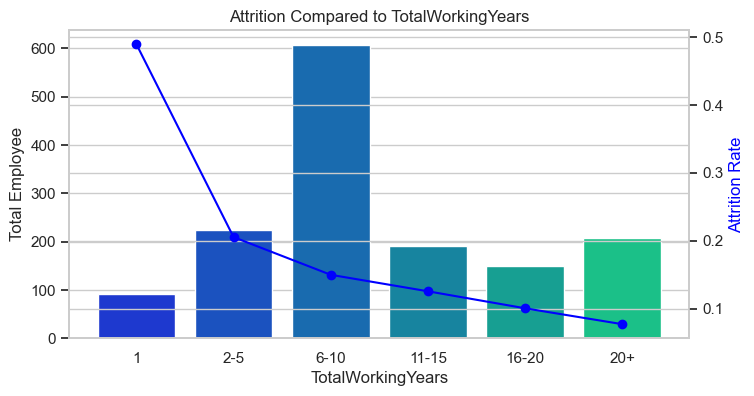

In [42]:
# Total Working Years & Attrition Table
bins = [0, 1, 5, 10, 15, 20, 40]
group_names = ['1', '2-5', '6-10', '11-15', '16-20', '20+']             
df2['TotalWorkingYears'] = pd.cut(df2['TotalWorkingYears'], bins, labels = group_names, 
                                  include_lowest = True)

analyze_feature(x='TotalWorkingYears', data=df2)


Employees with only 1 year of total working experience have the highest attrition rate, making up nearly 19% of the company's overall attrition. Similarly, those with 2-5 years of experience exhibit a comparable attrition rate of around 19%. On the other hand, employees with 20 or more years of experience have a much lower attrition rate of approximately 6.8%.

TrainingTimesLastYear & Attrition Table
   TrainingTimesLastYear  Total Employee  Attrition Number  Attrition Rate  \
0                      0              54                15        0.277778   
1                      1              71                 9        0.126761   
2                      2             547                98        0.179159   
3                      3             491                69        0.140530   
4                      4             123                26        0.211382   
5                      5             119                14        0.117647   
6                      6              65                 6        0.092308   

   % Attrition in the Company  
0                    6.329114  
1                    3.797468  
2                   41.350211  
3                   29.113924  
4                   10.970464  
5                    5.907173  
6                    2.531646  


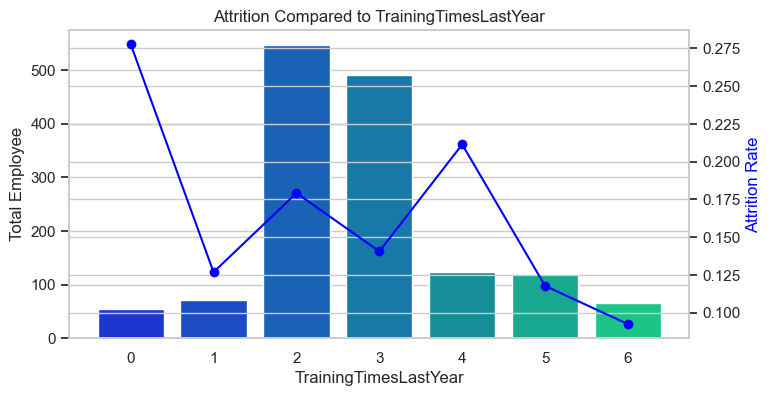

In [43]:
analyze_feature(x='TrainingTimesLastYear', data=df2)

Employees who underwent no training in the last year have the highest attrition rate at 27.8%, contributing to 6.3% of the company's overall attrition. Interestingly, employees with 2 training sessions have the highest absolute attrition number, making up 41.4% of the company's total attrition. The majority of employees participated in 2 training sessions, followed by those who attended 3 sessions. Employees with 6 training sessions have the lowest attrition rate at 9.2%.

WorkLifeBalance & Attrition Table
  WorkLifeBalance  Total Employee  Attrition Number  Attrition Rate  \
0             Bad              80                25        0.312500   
1            Best             153                27        0.176471   
2          Better             893               127        0.142217   
3            Good             344                58        0.168605   

   % Attrition in the Company  
0                   10.548523  
1                   11.392405  
2                   53.586498  
3                   24.472574  


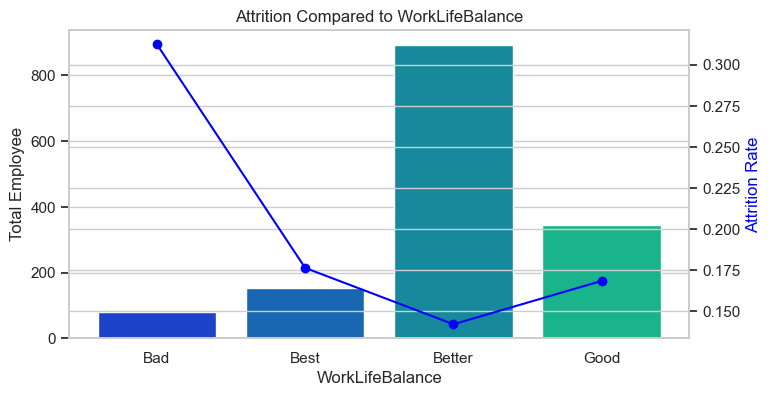

In [44]:
# Labeling Work Life Balance Groups
df2['WorkLifeBalance'] = df2['WorkLifeBalance'].map({1:'Bad', 2:'Good', 3:'Better', 4:'Best'})

analyze_feature(x='WorkLifeBalance', data=df2)

Employees who perceive their work-life balance as "Bad" have the highest attrition rate at 31.3%, contributing to 10.5% of the company's overall attrition. Conversely, those with the "Best" work-life balance exhibit a lower attrition rate of 17.6%. The majority of employees report having a "Better" work-life balance, and this group contributes significantly to the company's overall attrition at 53.6%.

YearsAtCompany & Attrition Table
  YearsAtCompany  Total Employee  Attrition Number  Attrition Rate  \
0              1             215                75        0.348837   
1            2-5             561                87        0.155080   
2           6-10             448                55        0.122768   
3            10+             246                20        0.081301   

   % Attrition in the Company  
0                   31.645570  
1                   36.708861  
2                   23.206751  
3                    8.438819  


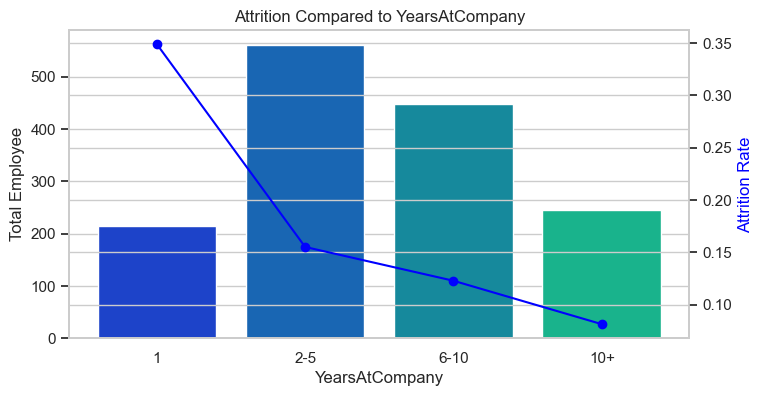

In [45]:
# Labeling Years at Company Groups
bins = [0, 1, 5, 10, 40]
group_names = ['1', '2-5', '6-10', '10+']             
df2['YearsAtCompany'] = pd.cut(df2['YearsAtCompany'], bins, labels = group_names, include_lowest = True)

analyze_feature(x='YearsAtCompany', data=df2)

Employees who have spent 1 year at the company exhibit the highest attrition rate at 34.9%, contributing to 31.6% of the overall company's attrition. Those with 2-5 years of tenure also show a substantial attrition rate of 15.5%, contributing to 36.7% of the overall attrition. Employees with 6-10 years of tenure have a lower attrition rate of 12.3%, while those with 10 or more years of tenure have the lowest attrition rate at 8.1%.

YearsInCurrentRole & Attrition Table
  YearsInCurrentRole  Total Employee  Attrition Number  Attrition Rate  \
0                  1             301                84        0.279070   
1                2-4             611                99        0.162029   
2                5-6              73                 3        0.041096   
3                  7             222                31        0.139640   
4               8-10             185                15        0.081081   
5                10+              78                 5        0.064103   

   % Attrition in the Company  
0                   35.443038  
1                   41.772152  
2                    1.265823  
3                   13.080169  
4                    6.329114  
5                    2.109705  


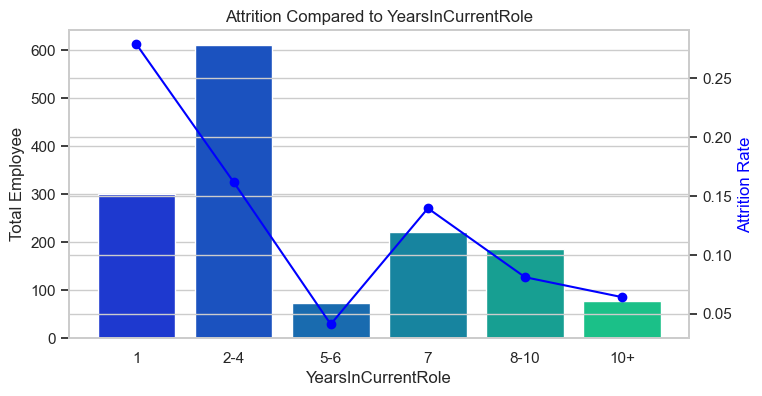

In [46]:
# Labeling Years in Current Role Groups
bins = [0, 1, 4, 6, 7, 10, 18]
group_names = ['1', '2-4', '5-6', '7', '8-10', '10+']             
df2['YearsInCurrentRole'] = pd.cut(df2['YearsInCurrentRole'], bins, labels = group_names, include_lowest = True)

analyze_feature(x='YearsInCurrentRole', data=df2)

Employees who have spent 1 year in their current role exhibit the highest attrition rate at 27.9%, contributing to 35.4% of the overall company's attrition. Those with 2-4 years in their current role also show a substantial attrition rate of 16.2%, contributing to 41.8% of the overall attrition. Employees with 5-6 years in their current role have a lower attrition rate of 4.1%, while those with 7 years, 8-10 years, and 10 or more years in their current role have attrition rates of 13.1%, 8.1%, and 2.1%, respectively.

YearsSinceLastPromotion & Attrition Table
  YearsSinceLastPromotion  Total Employee  Attrition Number  Attrition Rate  \
0                       0             581               110        0.189329   
1                       1             357                49        0.137255   
2                       2             159                27        0.169811   
3                       3              52                 9        0.173077   
4                     4-6             138                13        0.094203   
5                       7              76                16        0.210526   
6                      8+             107                13        0.121495   

   % Attrition in the Company  
0                   46.413502  
1                   20.675105  
2                   11.392405  
3                    3.797468  
4                    5.485232  
5                    6.751055  
6                    5.485232  


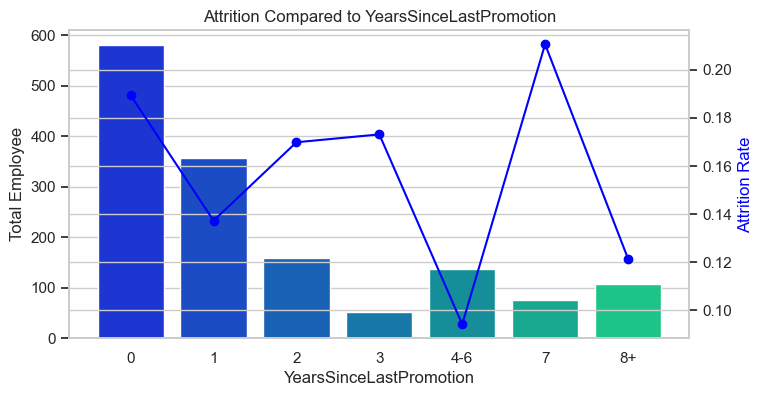

In [47]:
# Labeling Years in Current Role Groups
bins = [0, 1, 2, 3, 4, 7, 8, 16]
group_names = ['0', '1', '2', '3', '4-6', '7', '8+']             
df2['YearsSinceLastPromotion'] = pd.cut(df2['YearsSinceLastPromotion'], bins, labels = group_names, 
                                        include_lowest = True, right = False)

analyze_feature(x='YearsSinceLastPromotion', data=df2)

Employees who have not received a promotion in the last year show the highest attrition rate at 18.9%, contributing to 46.4% of the overall company's attrition. Those who were promoted 1, 2, 3, and 4-6 years ago have attrition rates of 13.7%, 16.9%, 17.3%, and 9.4%, respectively. Employees who were promoted 7 years ago or have not received a promotion in 8 or more years show attrition rates of 21.1% and 12.1%, respectively.

YearsWithCurrManager & Attrition Table
   YearsWithCurrManager  Total Employee  Attrition Number  Attrition Rate  \
0                     0             263                85        0.323194   
1                     1              76                11        0.144737   
2                     2             344                50        0.145349   
3                     3             142                19        0.133803   
4                     4              98                11        0.112245   
5                     5              31                 4        0.129032   
6                     6              29                 4        0.137931   
7                     7             216                31        0.143519   
8                     8             107                10        0.093458   
9                     9              64                 6        0.093750   
10                  10+             100                 6        0.060000   

    % Attrition in the Company  
0  

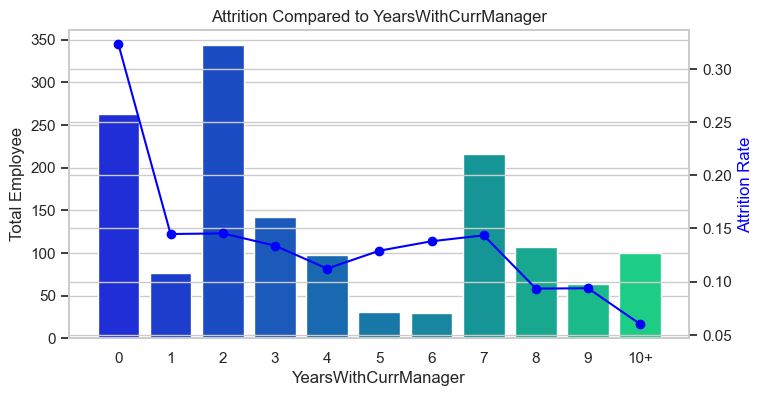

In [48]:
# Labeling Years with Current Manager Groups
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 18]
group_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']             
df2['YearsWithCurrManager'] = pd.cut(df2['YearsWithCurrManager'], bins, labels = group_names, 
                                     include_lowest = True, right = False)

analyze_feature(x='YearsWithCurrManager', data=df2)

The majority of employees leave the company within their first year under their current manager. Another notable group with a high attrition rate is employees who have worked for two years with their current manager.


**'Daily Rate', 'Employee Number', 'Hourly Rate' and 'Monthly Rate'** features were also reviewed, but no significant patterns or insights were found.

### Correlation Matrix

Let's examine the relationships between variables. A useful method for this is to use a correlation matrix, visualized as a heat map.

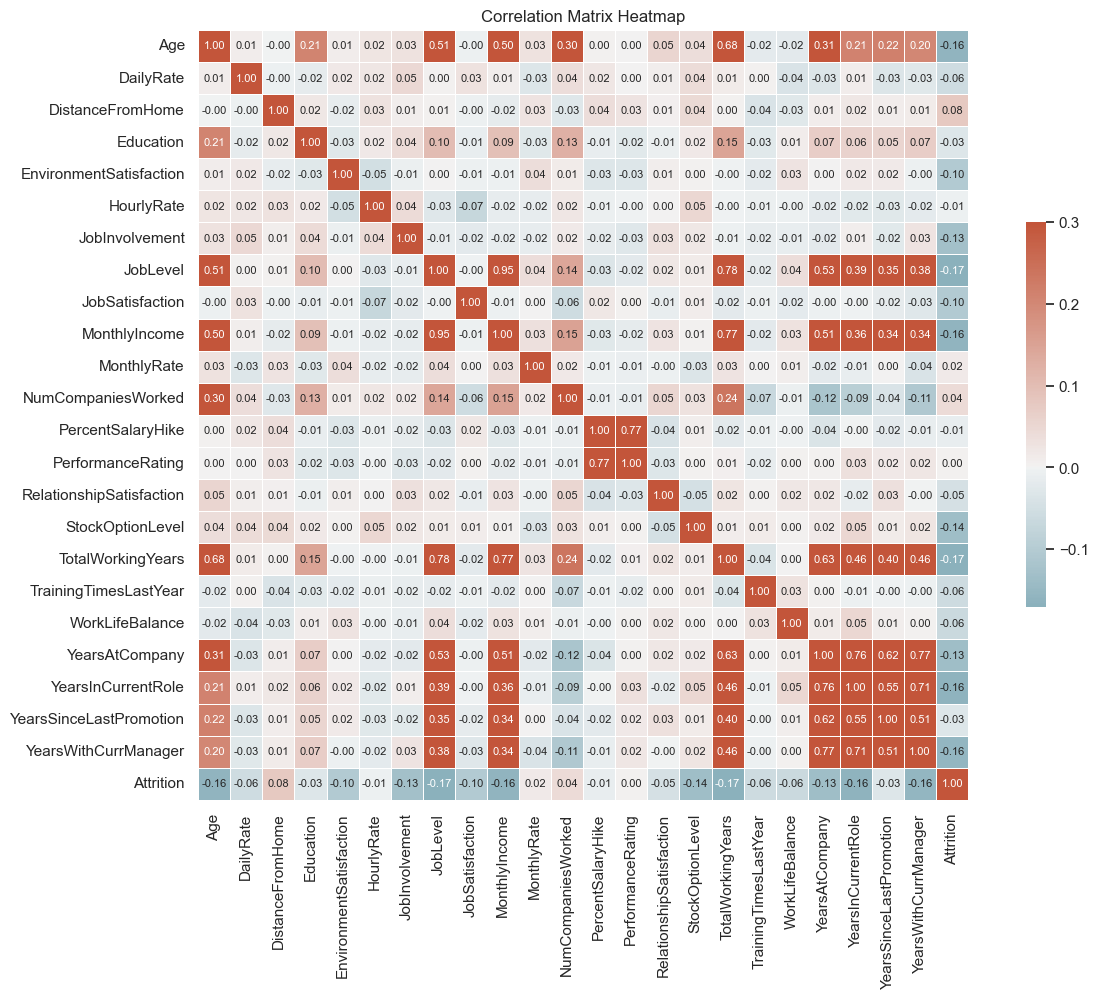

In [49]:
# Select only numeric columns for correlation
numeric_columns = df.drop(['EmployeeNumber'], axis=1).select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Define a custom color map
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_matrix, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True, fmt=".2f", annot_kws={"size": 8}, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation Matrix Heatmap")
plt.show()

The correlation between "Attrition" and other variables is generally weak, with the highest positive correlation being with **"DistanceFromHome"** (0.078) and the highest negative correlation being with **"StockOptionLevel"** (-0.137).

"DailyRate," "HourlyRate," "MonthlyRate," and "PerformanceRating" have very weak correlations with "Attrition."

---

"YearsAtCompany," "YearsInCurrentRole," "YearsSinceLastPromotion," and "YearsWithCurrManager" have strong correlations with each other. Strong correlations between these variables may indicate a relationship or similarity in how they change or evolve over time for employees within the company.

This information is valuable for further analysis and modeling. When dealing with highly correlated features, it's essential to consider potential multicollinearity issues, as high correlations between predictors can lead to instability in regression models. However, in some cases, the relationships between these variables may be expected, especially in the context of employee tenure and career progression.

Consideration and handling of multicollinearity, such as using regularization techniques or feature engineering, may be necessary when building predictive models to avoid potential issues.

## 7. Pre-processing & Training Data Development

Before inputting our data into a machine learning model, it's essential to prepare the data. This involves encoding all categorical features, as the model requires numerical input. Additionally, for improved performance, we'll perform feature scaling to bring all features onto the same scale. We'll achieve this using the StandardScaler provided in the scikit-learn library.

In [50]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,...,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,...,4,1,6,3,3,2,2,2,2,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   BusinessTravel            1470 non-null   category
 2   DailyRate                 1470 non-null   int64   
 3   Department                1470 non-null   category
 4   DistanceFromHome          1470 non-null   int64   
 5   Education                 1470 non-null   int64   
 6   EducationField            1470 non-null   category
 7   EmployeeNumber            1470 non-null   int64   
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   category
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   int64   
 12  JobLevel                  1470 non-null   int64   
 13  JobRole                   1470 non-null   catego

### 7.1.  Feature EncodingNow, we will create dummy or indicator features for categorical variables

In [52]:
# Select columns with object and categorical data types
dfo = df.select_dtypes(include=['object', 'category']) 

# Drop object and categorical columns, then concatenate dummy variables
df = pd.concat([df.drop(dfo, axis=1), pd.get_dummies(dfo, dtype=int)], axis=1)
df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,2,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,5,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,7,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0


Successfully created dummy features using one-hot encoding for categorical variables. The original categorical columns were replaced with binary indicator variables, enabling the machine learning model to process categorical data effectively.

Now, let's check the correlation with new features:

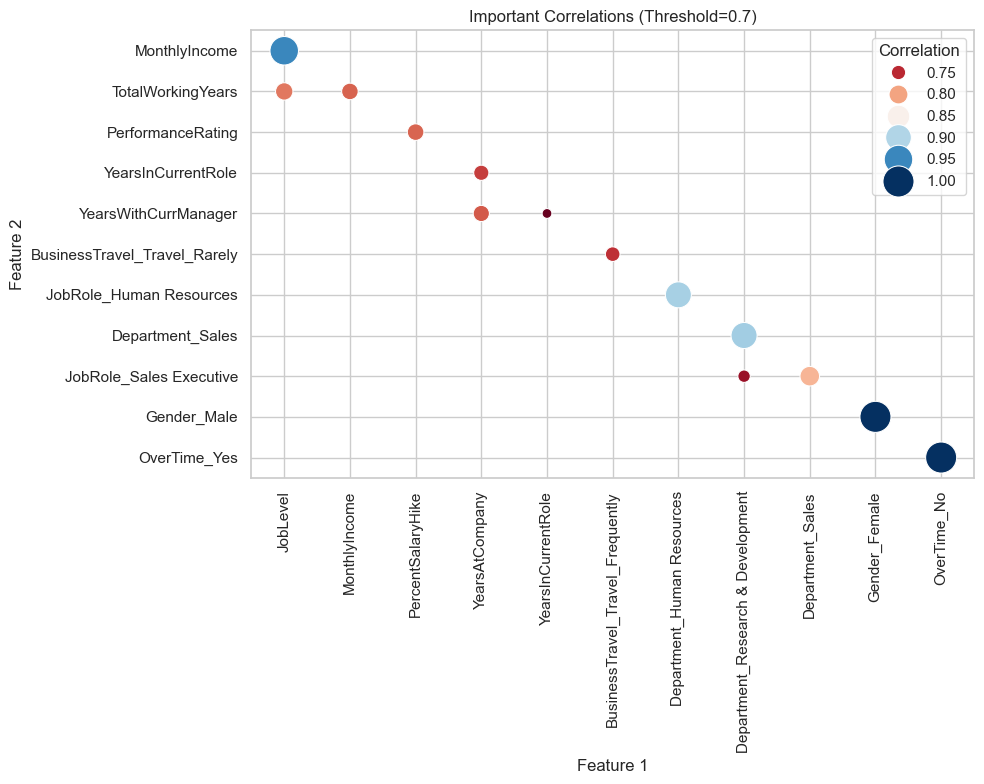

In [53]:
# Filter correlations based on threshold 
threshold = 0.7  # Example threshold, adjust as needed
corr_matrix = df.corr().abs()

# Filter out upper triangle and diagonal elements
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Filter correlations based on threshold
important_correlations = upper_triangle[upper_triangle > threshold].stack().reset_index()
important_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Plot the filtered correlations
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Feature 1', y='Feature 2', size='Correlation', data=important_correlations, hue='Correlation', palette='RdBu', sizes=(50, 500))
plt.title(f'Important Correlations (Threshold={threshold})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Correlation', loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 7.2. Feature Scaling
Let's standardize the magnitude of numeric features using the StandardScaler 

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop('Attrition',axis=1))

In [55]:
means = np.mean(scaled_df, axis=0)
stds = np.std(scaled_df, axis=0)
print(means)
print(stds)

[-3.50437744e-17  5.07530526e-17  4.35026165e-17  7.00875488e-17
 -1.54675970e-16  1.30507849e-16  1.69176842e-16  6.52539247e-17
 -2.65849323e-17 -9.18388570e-17 -4.47110225e-17  3.02101503e-17
  1.45008722e-17  2.27180330e-16 -6.11453443e-16  9.66724811e-17
  6.76707367e-17 -1.20840601e-18  8.70052330e-17 -6.04203007e-18
 -3.02101503e-17  9.06304510e-17  1.20840601e-18 -2.77933383e-17
  1.20840601e-18  9.66724811e-18 -1.01506105e-16  6.76707367e-17
  2.90017443e-17  8.45884209e-17 -6.40455187e-17 -2.17513082e-17
 -4.22942105e-17  5.92118946e-17  3.74605864e-17  1.32924661e-17
 -4.35026165e-17  4.35026165e-17 -3.14185563e-17 -2.41681203e-17
 -8.33800149e-17  4.35026165e-17 -4.35026165e-17  5.25656616e-17
 -4.47110225e-17  1.20840601e-18  1.45008722e-17 -2.17513082e-17
  1.20840601e-16 -4.47110225e-17  4.35026165e-17 -4.35026165e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1

The means are very close to zero and all standard deviations are close to one. 
These results indicate that the scaling process has been successfully completed. The features are now on the same scale and are suitable for modeling.

### 7.3. Splitting into testing and training datasets

The data should be divided into training and testing sets. We will utilize the "train_test_split" function to split the data, allocating 25% for testing and 75% for training.

In [56]:
print(scaled_df.shape)

(1470, 52)


In [57]:
from sklearn.model_selection import train_test_split

X = scaled_df
y = df['Attrition'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [58]:
# Check the dimensions of the training and testing sets
print("Training set dimensions:", X_train.shape, y_train.shape)
print("Testing set dimensions:", X_test.shape, y_test.shape)

Training set dimensions: (1102, 52) (1102,)
Testing set dimensions: (368, 52) (368,)


The original scaled dataset has 1470 samples and 52 features. After splitting into training and testing sets, we have:

- Training set dimensions: (1102, 52) for features and (1102,) for labels.
- Testing set dimensions: (368, 52) for features and (368,) for labels.

The dimensions match the expected proportions, with 75% of the data allocated to the training set and 25% to the testing set. So, the data splitting process appears to be successful.

## 8. Modeling

In this section, we employ various machine learning algorithms to build predictive models for attrition prediction. Let's break down the process and analyze the results comprehensively:

### 8.1. Model Selection and Hyperparameter Tuning

We consider a range of machine learning models, including 
- Logistic Regression,
- K-Nearest Neighbors,
- Support Vector Machine (SVM),
- Random Forest,
- Naive Bayes,
- Gradient Boosting,
- XGBoost

Each model is initialized with default parameters, and hyperparameter tuning is performed using GridSearchCV to find the optimal set of parameters for each model.

In [59]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

In [60]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'Random Forest (Entropy)': RandomForestClassifier(criterion='entropy', random_state=42),
    'Random Forest (Gini)': RandomForestClassifier(criterion='gini', random_state=42),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Hyperparameter grids for models
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'K-Nearest Neighbor': {'n_neighbors': [3, 5, 7]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Random Forest (Entropy)': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]},
    'Random Forest (Gini)': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]},
    'Naive Bayes': {},
    'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05], 'max_depth': [3, 5]},
    'XGBoost': {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01], 'n_estimators': [100, 200]}
}

Model: Logistic Regression
Accuracy: 0.8967391304347826
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       320
           1       0.68      0.40      0.50        48

    accuracy                           0.90       368
   macro avg       0.80      0.68      0.72       368
weighted avg       0.88      0.90      0.88       368

Confusion Matrix:
[[311   9]
 [ 29  19]]


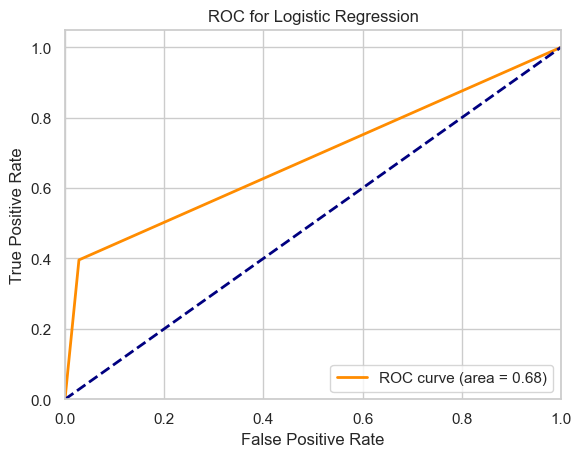

-------------------------------------
Model: K-Nearest Neighbor
Accuracy: 0.8913043478260869
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       320
           1       0.68      0.31      0.43        48

    accuracy                           0.89       368
   macro avg       0.79      0.65      0.68       368
weighted avg       0.88      0.89      0.87       368

Confusion Matrix:
[[313   7]
 [ 33  15]]


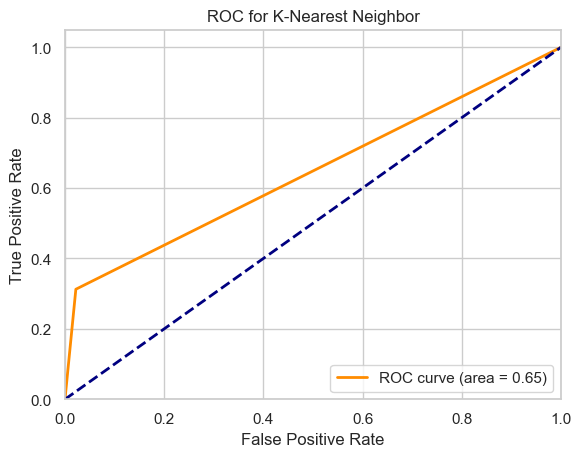

-------------------------------------
Model: Support Vector Machine
Accuracy: 0.8994565217391305
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       320
           1       0.69      0.42      0.52        48

    accuracy                           0.90       368
   macro avg       0.80      0.69      0.73       368
weighted avg       0.89      0.90      0.89       368

Confusion Matrix:
[[311   9]
 [ 28  20]]


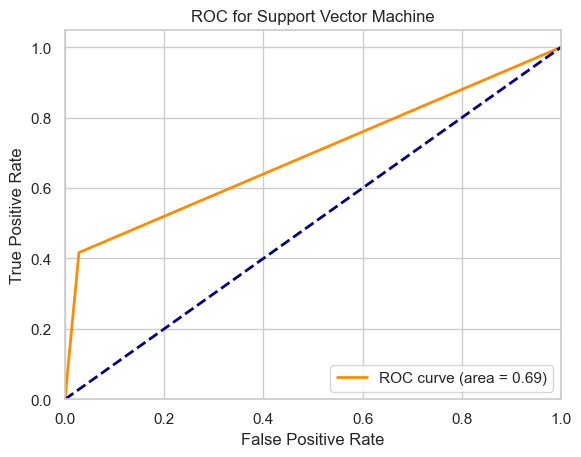

-------------------------------------
Model: Random Forest (Entropy)
Accuracy: 0.8695652173913043
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.50      0.08      0.14        48

    accuracy                           0.87       368
   macro avg       0.69      0.54      0.54       368
weighted avg       0.83      0.87      0.83       368

Confusion Matrix:
[[316   4]
 [ 44   4]]


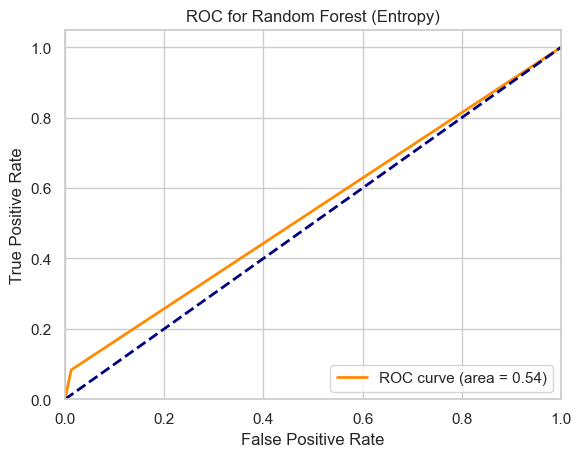

-------------------------------------
Model: Random Forest (Gini)
Accuracy: 0.8695652173913043
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.50      0.08      0.14        48

    accuracy                           0.87       368
   macro avg       0.69      0.54      0.54       368
weighted avg       0.83      0.87      0.83       368

Confusion Matrix:
[[316   4]
 [ 44   4]]


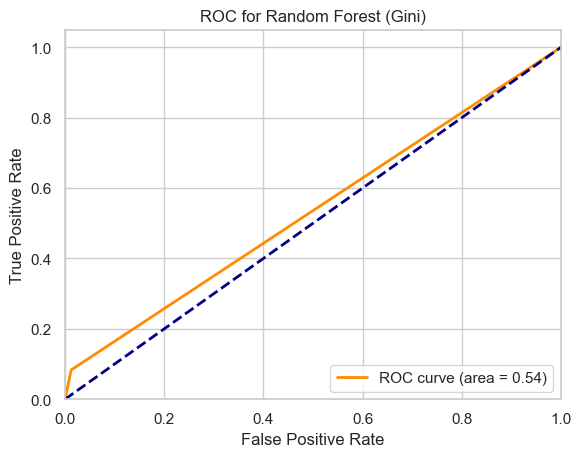

-------------------------------------
Model: Naive Bayes
Accuracy: 0.6820652173913043
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       320
           1       0.23      0.60      0.33        48

    accuracy                           0.68       368
   macro avg       0.57      0.65      0.56       368
weighted avg       0.83      0.68      0.73       368

Confusion Matrix:
[[222  98]
 [ 19  29]]


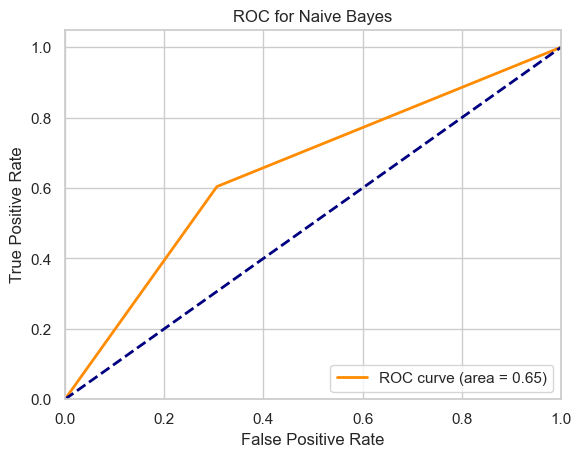

-------------------------------------
Model: Gradient Boosting
Accuracy: 0.8831521739130435
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.93       320
           1       0.59      0.33      0.43        48

    accuracy                           0.88       368
   macro avg       0.75      0.65      0.68       368
weighted avg       0.87      0.88      0.87       368

Confusion Matrix:
[[309  11]
 [ 32  16]]


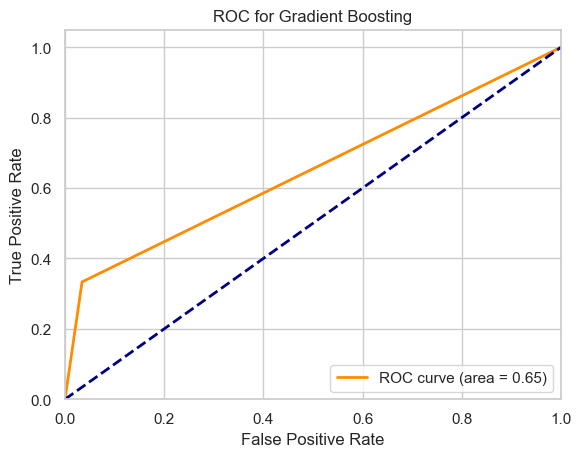

-------------------------------------
Model: XGBoost
Accuracy: 0.8885869565217391
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       320
           1       0.68      0.27      0.39        48

    accuracy                           0.89       368
   macro avg       0.79      0.63      0.66       368
weighted avg       0.87      0.89      0.87       368

Confusion Matrix:
[[314   6]
 [ 35  13]]


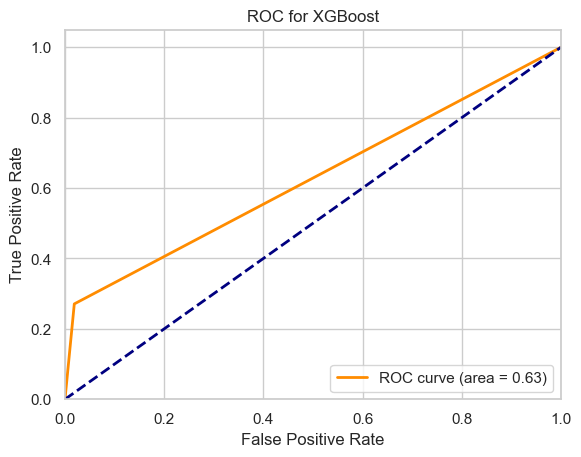

-------------------------------------


In [61]:
# Fit models and perform hyperparameter tuning
best_model = None
best_score = 0
results = [] # an empty list to store model results

for name, model in models.items():
    param_grid = param_grids[name]
    grid_search = GridSearchCV(model, param_grid, cv=5) # Hyperparameter tuning
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(conf_matrix)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for ' + name)
    plt.legend(loc="lower right")
    plt.show()
    print("-------------------------------------")
    
    results.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc})
    
    if accuracy > best_score:
        best_model = grid_search.best_estimator_
        best_score = accuracy



After training each model with the hyperparameter-tuned settings, we evaluate their performance on the test set. Metrics such as accuracy, precision, recall, F1-score, and ROC AUC are computed for each model. Additionally, classification reports and confusion matrices are generated to provide detailed insights into model performance.


### 8.2. Comparison of Model Performance

We compare the performance of different models based on their accuracy values. 

In [62]:
# Identify the best model
print("Best Model:", best_model)
print("Best Accuracy:", best_score)

# Model comparison table
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Style the table
styled_df = results_df.style.background_gradient(cmap=sns.light_palette("green", as_cmap=True))
display(styled_df)

Best Model: SVC(C=0.1, kernel='linear', random_state=42)
Best Accuracy: 0.8994565217391305


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
2,Support Vector Machine,0.899457,0.689655,0.416667,0.519481,0.694271
0,Logistic Regression,0.896739,0.678571,0.395833,0.500000,0.683854
1,K-Nearest Neighbor,0.891304,0.681818,0.312500,0.428571,0.645313
7,XGBoost,0.888587,0.684211,0.270833,0.388060,0.626042
6,Gradient Boosting,0.883152,0.592593,0.333333,0.426667,0.649479
3,Random Forest (Entropy),0.869565,0.500000,0.083333,0.142857,0.535417
4,Random Forest (Gini),0.869565,0.500000,0.083333,0.142857,0.535417
5,Naive Bayes,0.682065,0.228346,0.604167,0.331429,0.648958


We observe that the **SVM** model achieves the highest accuracy among all models, indicating its effectiveness in classifying the dataset accurately. Furthermore, we examine precision, recall, and F1-score metrics to gain a deeper understanding of model performance across different classes.

- In terms of Precision, the "Support Vector Machine" model has the highest value. This suggests that the false positive rate of SVM's positive predictions is lower compared to other models, making it more reliable.
- According to the Recall metric, the "Naive Bayes" model has the highest value. This implies that the Naive Bayes model has a lower rate of missing true positives compared to other models, making it more sensitive.
- The F1 Score metric shows that the "Support Vector Machine" model has the highest value. This indicates that SVM achieves a balanced high level of both precision and recall, hence demonstrating the best overall performance.

### 8.3. Best Model Identification

The **SVM model** with a linear kernel and regularization parameter C=0.1 is identified as the best-performing model based on its accuracy score. This model achieves an accuracy of approximately 0.899, demonstrating its ability to make accurate predictions on the test data.

In [63]:
# Final prediction SVM:
y_pred_svm = best_model.predict(X_test)  # best_model represents SVM model

# User IDs
X_test_df = pd.DataFrame(X_test)
employee_id = df.loc[X_test_df.index, 'EmployeeNumber']

# Convert the predictions to a Series
target = pd.Series(y_pred_svm, name='Attrition')

# Create the output DataFrame
output_svm = pd.DataFrame({'Employee_Number': employee_id, 'Attrition': target})

# Write the results to a CSV file
output_svm.to_csv('final_result_svm.csv', index=False, header=True)

### 8.4. Feature Importance Analysis & Visualization

We extract the coefficients of the SVM model to visualize the importance of features in predicting attrition. 

- The coefficients represent the weight assigned to each feature by the SVM model.- 
Positive coefficients indicate features that positively contribute to predicting attrition, while negative coefficients suggest features that negatively influence the prediction
- 
Features with higher absolute coefficient values have a stronger impact on the model's predictions.

A horizontal bar plot is generated, showing the magnitude of coefficients for each feature. This helps us understand which features contribute the most to the SVM model's predictive performance.

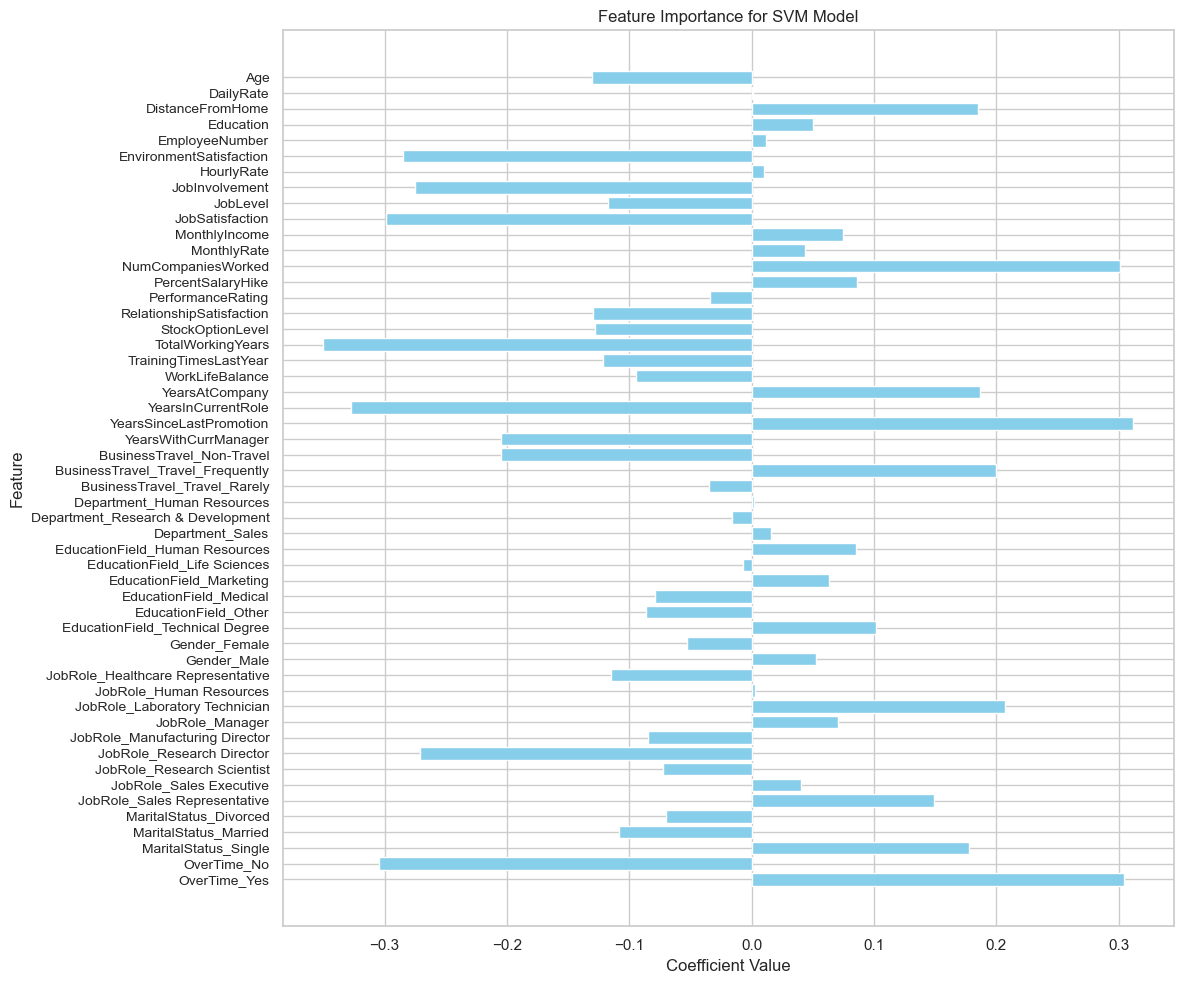

In [64]:
# Extract the coefficients of the SVM model
coefficients = best_model.coef_[0]

# Get feature names
feature_names = df.drop('Attrition', axis=1).columns

# Plot the coefficients
plt.figure(figsize=(12, 10))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance for SVM Model')
plt.gca().invert_yaxis()
plt.yticks(fontsize=10) 
plt.tight_layout()
plt.show()

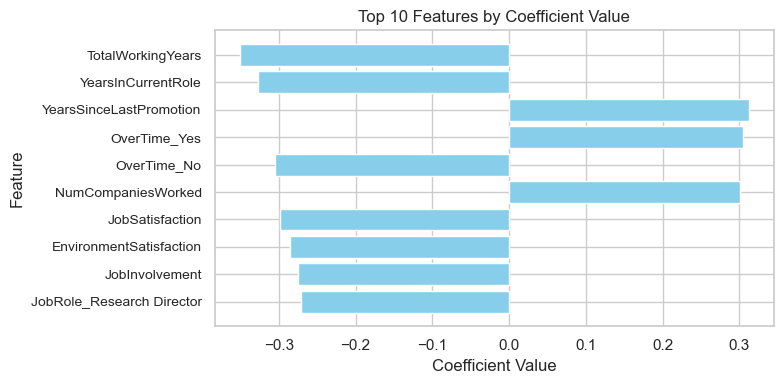

In [65]:
# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

# Select the top n features
n_top_features = 10  # Define the number of top features to visualize
top_features = coefficients_df.head(n_top_features)

# Plot the coefficients of the top features
plt.figure(figsize=(8, 4))
plt.barh(top_features['Feature'], top_features['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title(f'Top {n_top_features} Features by Coefficient Value')
plt.gca().invert_yaxis()
plt.yticks(fontsize=10) 
plt.tight_layout()
plt.show()

* Features such as **NumCompaniesWorked**, **YearsSinceLastPromotion** and **OverTime_Yes** have relatively higher positive coefficients, indicating that they play a significant role in predicting attrition.
* Conversely, features like **TotalWorkingYears**, **YearsInCurrentRole**, **OverTime_No** and **JobSatisfaction** have negative coefficients, suggesting that lower levels of satisfaction and involvement are associated with higher attrition rates.
* Understanding the relative importance of these features can guide organizational strategies to mitigate attrition risk by focusing on improving employee satisfaction, tenure, and work-life balance while addressing factors like job involvement and overtime.

### 8.5. Handling Imbalanced Data with SMOTE

To address the issue of class imbalance, we employ the Synthetic Minority Over-sampling Technique (SMOTE) to balance the dataset. We then train a new SVM model using the balanced data and evaluate its performance. While SMOTE improves the recall for the minority class (attrition), it leads to a decrease in precision, indicating a trade-off between sensitivity and false positive rate.

In [66]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Applying SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the SVM model
svm = SVC(random_state=42)

# Define hyperparameters for tuning
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Perform grid search with cross-validation
svm_grid = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
svm_grid.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_svm = svm_grid.best_estimator_

# Evaluate the model on the testing set
y_pred = best_svm.predict(X_test)

# Print classification report
print("SVM (with SMOTE) Classification Report:")
print(classification_report(y_test, y_pred))

accuracy_smote = accuracy_score(y_test, y_pred)
print(f"SVM (with SMOTE) Accuracy: {accuracy_smote}")

SVM (with SMOTE) Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       320
           1       0.56      0.38      0.45        48

    accuracy                           0.88       368
   macro avg       0.74      0.67      0.69       368
weighted avg       0.87      0.88      0.87       368

SVM (with SMOTE) Accuracy: 0.8804347826086957



The Support Vector Machine (SVM) model achieves an accuracy of approximately 0.899 when trained on the original imbalanced dataset.

Applying SMOTE improves the SVM model's ability to correctly identify instances of attrition (class 1) by balancing the dataset, resulting in a higher recall for the minority class. However, this improvement comes at the cost of lower precision for the minority class, indicating a higher rate of false positives

Overall, the SVM model demonstrates strong predictive performance for attrition prediction. However, the decision to use SMOTE should be made based on the specific requirements of the application, considering the trade-offs between recall and precision. By employing a rigorous evaluation process and exploring different machine learning techniques, we can build robust predictive models for attrition prediction in organizations.

## 9. Conclusion


In conclusion, the modeling stage provided valuable insights into predicting attrition using machine learning techniques. By systematically exploring various models, conducting hyperparameter tuning, and evaluating performance metrics, we identified the Support Vector Machine (SVM) model as the most effective for this task. The SVM model demonstrated the highest accuracy among the models evaluated, making it a reliable choice for predicting attrition.

Additionally, our analysis revealed important features that significantly influence attrition prediction, such as job involvement, satisfaction levels, tenure, and overtime status. Understanding these factors can help organizations proactively address issues related to employee retention and engagement.

Overall, this comprehensive approach not only resulted in a robust predictive model but also deepened our understanding of the underlying factors contributing to attrition within the organization. Moving forward, these insights can inform strategic decisions and interventions aimed at reducing attrition rates and fostering a more engaged workforce.